In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

print(f"Pandas Ver : {pd.__version__}")
print(f"Numpy  Ver : {np.__version__}")
print(f"Sklearn Ver : {sklearn.__version__}")
print(f"Seaborn Ver : {sns.__version__}")

Pandas Ver : 1.1.5
Numpy  Ver : 1.19.5
Sklearn Ver : 0.22.2.post1
Seaborn Ver : 0.11.1


In [2]:
!gdown --id "1YT9tJ5wygYidlz0ie6RqzMR7AFCGJ5Qe"

Downloading...
From: https://drive.google.com/uc?id=1YT9tJ5wygYidlz0ie6RqzMR7AFCGJ5Qe
To: /content/dataset.csv
100% 287k/287k [00:00<00:00, 40.5MB/s]


In [3]:
data = pd.read_csv("/content/dataset.csv")
data.sample(8)

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,GrLivArea,ExterCond,SalePrice
144,1.110214,0.009759,-0.064658,-0.261682,-0.086279,-0.513699,0.548873,0.179825,1.021420,1.036171,-0.217239,12.259613
535,0.409895,0.106211,-0.064658,-0.261682,-0.791187,-0.513699,-0.049795,-0.764100,-0.691884,0.205524,-0.217239,11.931636
150,0.904238,-0.317344,-0.064658,-0.261682,-0.791187,2.228313,-1.971835,0.274218,-0.691884,-0.489199,-0.217239,11.751942
1032,-0.414011,-0.044400,-0.064658,2.252555,-0.086279,-0.513699,-1.688255,-1.660829,-0.691884,1.032395,-0.217239,11.771436
177,-0.537596,-0.005769,-0.064658,2.252555,-1.496096,-1.427703,-1.436184,-1.660829,-0.691884,-0.345724,-0.217239,11.580584
395,-0.825963,-0.508354,-0.064658,-0.261682,-1.496096,1.314309,-1.058078,0.698984,-0.691884,-0.717627,-0.217239,11.401670
189,4.282249,0.654749,-0.064658,-0.261682,1.323537,-0.513699,0.769435,0.510199,1.021420,2.421841,-0.217239,12.906692
1147,0.739457,0.342543,-0.064658,-0.261682,1.323537,-0.513699,1.084524,0.982162,1.021420,1.832837,-0.217239,12.546868


In [4]:
data.isna().sum()

LotFrontage     0
LotArea         0
Street          0
Alley           0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
GrLivArea       0
ExterCond       0
SalePrice       0
dtype: int64

### **Scatterpplot Luaran Distribusi Nilai Pada Kolom**

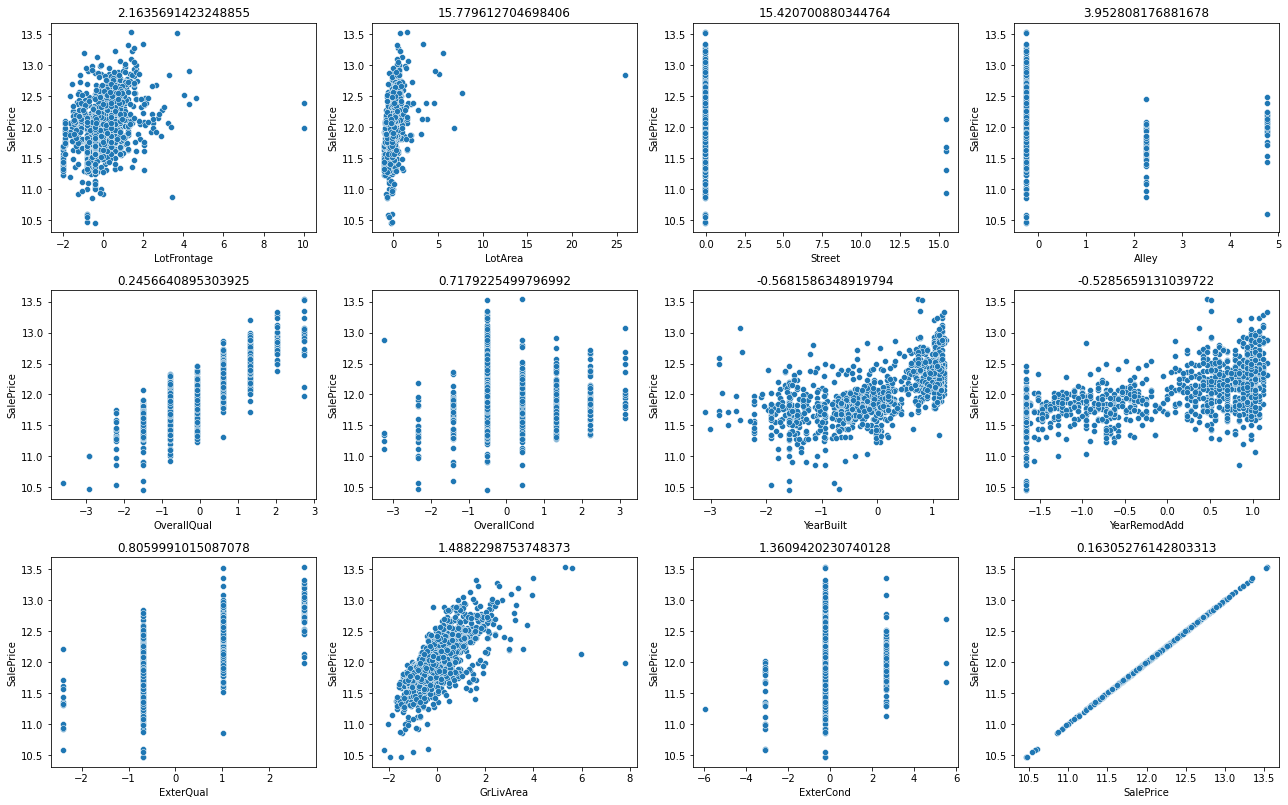

In [5]:
fig = plt.figure(figsize=(18, 22))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(int(len(data.columns))/2, 4, i+1)
    plt.title(data[col].skew())
    sns.scatterplot(x=col, y="SalePrice", data = data)

fig.tight_layout()
plt.show()

## **Modelling Data Train Dan Test**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
X = data.iloc[:, :-1]
Y = data["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (960, 11)
x_test shape: (241, 11)
---------------------------------
y_train shape: (960,)
y_test shape: (241,)


### **Model Linear Regression**

In [9]:
LinearRegressionObj = LinearRegression()
LinearRegressionObj.fit(x_train, y_train)

y_pred = LinearRegressionObj.predict(x_test)

mean: 12.008745170109785
std : 0.40969137076324014
max : 13.126030644751802
min : 10.596634733096073



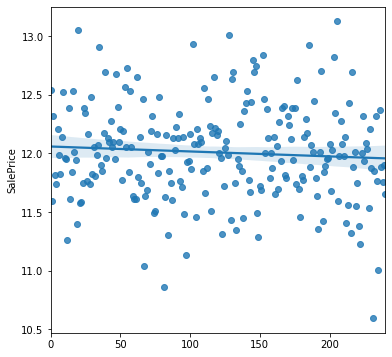

In [10]:
plt.figure(figsize=(6, 6))
sns.regplot(x=np.arange(len(y_test)), y = y_test)

print(f"mean: {y_test.mean()}")
print(f"std : {y_test.std()}")
print(f"max : {y_test.max()}")
print(f"min : {y_test.min()}\n")

mean :12.007818850280461
std : 0.35666395832663655
max : 12.872298563169059
min : 10.977968834664889



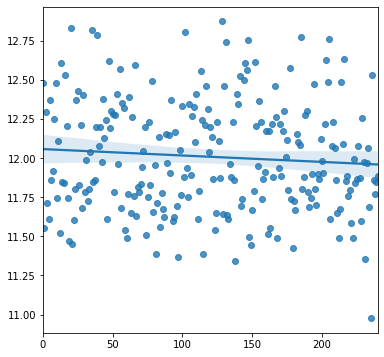

In [11]:
plt.figure(figsize=(6, 6))
sns.regplot(x=np.arange(len(y_pred)), y = y_pred)

print(f"mean :{y_pred.mean()}")
print(f"std : {y_pred.std()}")
print(f"max : {y_pred.max()}")
print(f"min : {y_pred.min()}\n")

In [12]:
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score : {r2_score(y_test, y_pred)}")

MSE : 0.028741794640473346
MAE : 0.12579236562433488
RMSE : 0.16953405156626603
R2 Score : 0.8280484679304131


In [13]:
LinearRegressionObj.coef_

array([ 0.0168183 ,  0.03050306, -0.01250879, -0.00528245,  0.1529279 ,
        0.05423862,  0.12062651,  0.01818675,  0.03329898,  0.13375804,
        0.00622454])

In [14]:
print(f"Model Formula : {LinearRegressionObj.intercept_} + {tuple(data.columns[val]+'*'+ str(LinearRegressionObj.coef_[val]) for val in range(len(LinearRegressionObj.coef_)))}".replace(","," +"))

Model Formula : 12.015634663126644 + ('LotFrontage*0.016818298725534597' + 'LotArea*0.030503059829157103' + 'Street*-0.012508788881492395' + 'Alley*-0.005282445373005918' + 'OverallQual*0.1529279028895316' + 'OverallCond*0.05423861896211694' + 'YearBuilt*0.12062650914397287' + 'YearRemodAdd*0.018186754213150347' + 'ExterQual*0.033298977984551545' + 'GrLivArea*0.1337580431800277' + 'ExterCond*0.006224543769127415')


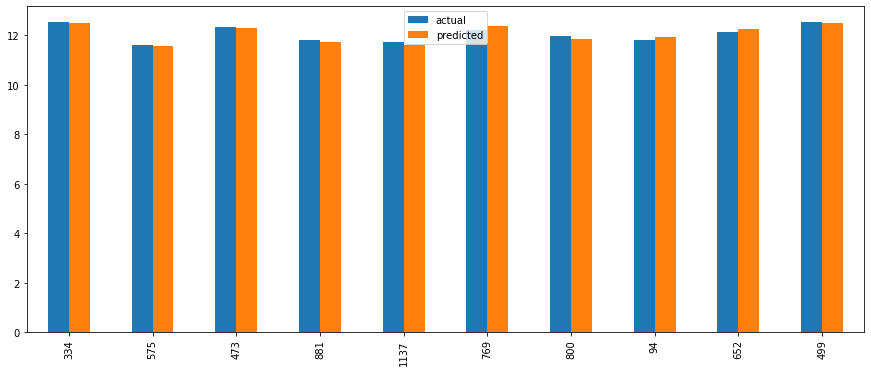

In [15]:
benchmark = pd.DataFrame({"actual" : (y_test),"predicted" : (y_pred)})
benchmark[:10].plot(kind="bar",figsize=(15, 6))

In [16]:
print(f'Persentase Perbedaan nilai rata-rata Actual dengan prediksi {(np.sum(np.abs(benchmark["actual"] - benchmark["predicted"])) / (benchmark.shape[0]) / np.sum(benchmark["actual"]))* 100}')

Persentase Perbedaan nilai rata-rata Actual dengan prediksi 0.004346499288174314


### **Model SGD Regressor**

In [17]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(x_train, y_train)

y_pred = sgd_reg.predict(x_test)

mean: 12.008745170109785
std : 0.40969137076324014
max : 13.126030644751802
min : 10.596634733096073 



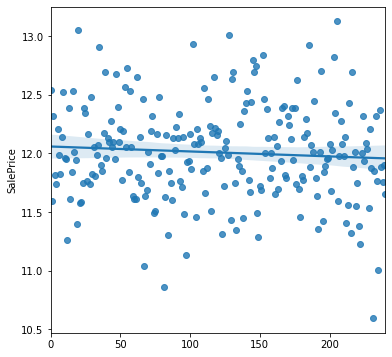

In [18]:
plt.figure(figsize=(6, 6))
sns.regplot(x=np.arange(len(y_test)), y = y_test)

print(f"mean: {y_test.mean()}")
print(f"std : {y_test.std()}")
print(f"max : {y_test.max()}")
print(f"min : {y_test.min()} \n")

mean :12.007431916556907
std : 0.34259682926553364
max : 12.85246458507731
min : 11.003435301299568



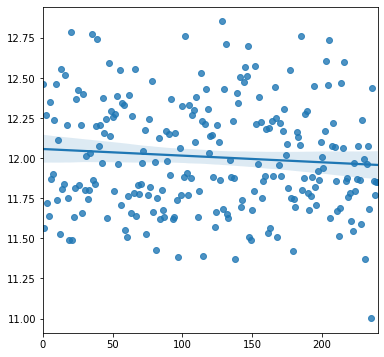

In [19]:
plt.figure(figsize=(6, 6))
sns.regplot(x=np.arange(len(y_pred)), y = y_pred)

print(f"mean :{y_pred.mean()}")
print(f"std : {y_pred.std()}")
print(f"max : {y_pred.max()}")
print(f"min : {y_pred.min()}\n")

In [20]:
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score : {r2_score(y_test, y_pred)}")

MSE : 0.03022372420330583
MAE : 0.12824956324451636
RMSE : 0.17384971729429366
R2 Score : 0.8191826311955897


In [21]:
sgd_reg.coef_

array([ 0.00858739,  0.0227439 , -0.01014958, -0.00309026,  0.13380397,
        0.06150932,  0.13217962,  0.01169203,  0.03963652,  0.13561537,
        0.00696833])

In [22]:
print(f"Model Formula : {sgd_reg.intercept_[0]} + {tuple(data.columns[val]+'*'+ str(sgd_reg.coef_[val]) \
        for val in range(len(sgd_reg.coef_)))}".replace(","," +"))

Model Formula : 12.01489996351083 + ('LotFrontage*0.008587392960936942' + 'LotArea*0.022743900277887166' + 'Street*-0.010149575974726521' + 'Alley*-0.003090257677996243' + 'OverallQual*0.13380396735554156' + 'OverallCond*0.0615093203571475' + 'YearBuilt*0.13217961541085976' + 'YearRemodAdd*0.011692032725932076' + 'ExterQual*0.03963651940184399' + 'GrLivArea*0.13561536527198492' + 'ExterCond*0.006968328152827434')


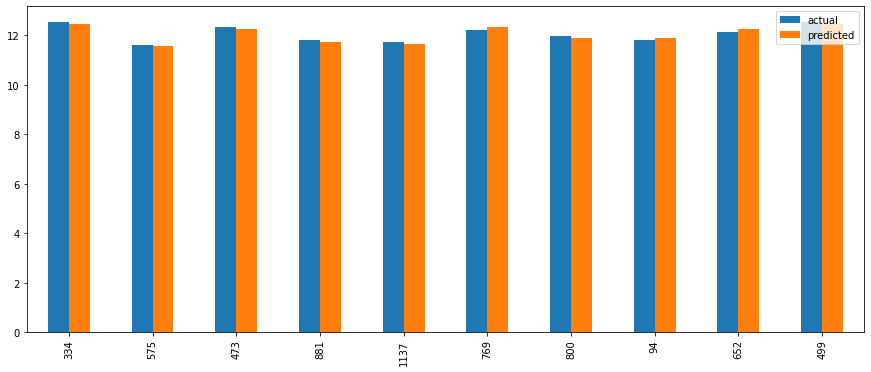

In [23]:
benchmark = pd.DataFrame({"actual" : (y_test),"predicted" : (y_pred)})
benchmark[:10].plot(kind="bar",figsize=(15, 6))

In [24]:
print(f'Persentase Perbedaan nilai rata-rata Actual dengan prediksi {(np.sum(np.abs(benchmark["actual"] - benchmark["predicted"])) / (benchmark.shape[0]) / np.sum(benchmark["actual"]))* 100}')

Persentase Perbedaan nilai rata-rata Actual dengan prediksi 0.004431402753134323


## **Analisis Model**

#### **Underfit, Bestfit, Overfit ?**

Berdasarkan hasil dari perhitungan R2 Score (>80) dan hasil plotting regplot pada variabel y_predic dapat disimpulkan hasil model yang didapatkan oleh model adalah bestfit.

#### **Perbedaan MSE, RMSE , dan MAE . Apa kelebihan dan kekurangannya ?**

- MAE (Mean Absolute Error) : Perhitungan yang tidak terlalu dipengaruhi oleh adanya outliers data. MAE melakukan perhitungan rata-rata error dengan memberikan bobot yang sama untuk seluruh data.

- MSE (Mean Squared Error) : Perhitungan yang dapat mempengaruhi hasil jika adanya outliers data. MAE melakukan perhitungan rata-rata error dengan memberikan bobot yang lebih besar pada data yaitu dengan menambahkan nilai kuadratik dari error. Hal ini akan berpotensi terhadap nilai error yang dihasilkan.

- RMSE (Root Mean Squared Error) : RMSE atau Akar kuadrar dari MSE merupakan perhitungan alternatif karena skala pengukuran data sama dengan data yang di evaluasi. Hal ini mengakibatkan jika terjadi error maka errornya akan 2 kali lebih besar dari MSE sebelumnya. Model ini sangatlah berpengaruh jika ada data Outlier.

### **Testing Model Prediction**

In [25]:
def do_prediction(columns, model):
    predicted = 0

    for i in range(len(columns[:-1])):
      predicted += model.coef_[i] * columns[i]
    
    return predicted + model.intercept_

print("------------------------")
print("Linear Regression Model")
print("------------------------")

for i in data.itertuples():
    print(f'Predicted : {do_prediction(i[1:], LinearRegressionObj)}' )
    if (i[0] == 5):
        break

print("\n---------------------")
print("SGD Regressor Model")
print("---------------------")
for i in data.itertuples():
    print(f'Predicted : {do_prediction(i[1:], sgd_reg)[0]}' )
    if (i[0] == 5):
        break

------------------------
Linear Regression Model
------------------------
Predicted : 12.296672054600078
Predicted : 12.056441804033796
Predicted : 12.320264069227711
Predicted : 11.879364110741891
Predicted : 12.549258563222443
Predicted : 11.926943172845416

---------------------
SGD Regressor Model
---------------------
Predicted : 12.296180190665684
Predicted : 12.069172877968862
Predicted : 12.315857166703047
Predicted : 11.846737679773149
Predicted : 12.524691005379399
Predicted : 11.92781547409424
